#  Projet d'optimisation: Reconnaissance d'hyperquadriques (Phase 3)

**Réalisé par:**
+ Karim HOCINE
+ Anis NEHMAR       

**Groupe:**        
+ Apprentis ISI

In [1]:
# Import des bibliotheque
import numpy as np
import matplotlib.pyplot as plt
import csv

## Importer les fonctions utilisées lors de la phase 1 et 2 du projet

### Fonction hyperquadrique

In [2]:
# Forme plus générale
def Quadrique(A, B, C,gamma,nH, x,y):
    somme = 0
    for k in range(nH):
        somme += abs(A[k]*x + B[k]*y + C[k])**gamma[k]
    return somme

### Fonction HQ_trace

In [3]:
def HQ_trace(lambdas,x,y,level, droite = False):
    # Lambdas: [A_k, B_k, C_k, gamma_K] Paramètres de l'hyperquadriques
    # x,y : Intervalle de visualisation à partir du quel nous allons créer une grille de valeurs pour notre contour
    # level: Niveu de l'isovaleur qu'on desire visualiser ( Dans notre cas on se limitera à li'sovaleur de niveau 1)

    nIso = 21 # Valeurs par défaut
    nh = len(lambdas)
    if len(lambdas[0]) == len(lambdas[1]):
        # Récupérer les paramètre de l'hyperquadrique
        A, B, C, G = [], [], [],[] 
        for i in range(len(lambdas)):
            A.append(lambdas[i][0])
            B.append(lambdas[i][1])
            C.append(lambdas[i][2])
            G.append(lambdas[i][3])
        
        m = len(x)
        x1,y1 = [0]*m,[0]*m
        # Créer un grille de valeurs
        x2d,y2d = np.meshgrid(x,y)
    
    
        #visualisation des isovaleurs
        #plt.contour(x2d,y2d,Quadrique(A,B,C,G,2,x2d,y2d),nIso, cmap = 'rainbow')
        plt.contour(x2d,y2d,Quadrique(A,B,C,G,nh,x2d,y2d),nIso,levels = [level], colors = 'black')
        plt.title("Isovaleurs de l'hyperquadratique")
        plt.xlabel('Valeurs de x')
        plt.ylabel('Valeurs de y')
        #plt.grid()
        plt.axis('square')
        
        # Si on veut afficher les droite englobantes, on force droite = True comme argument de la fonction
        # Par défaut il est mis sur False pour avoir de la visibilité lors de la visualisation des hyperquadriques
        if droite == True:
            for i in range (len(lambdas)):
                for k in range (m):
                    x1[k] = x[k]
                    y1[k] = y[k]

                if B[i] != 0:
                    for k in range (m):
                        y1[k]= (-(A[i]/B[i])*x1[k]-(C[i]/B[i])+1/B[i])
                    plt.plot(x1,y1)
                    for k in range (m):
                        y1[k]= (-(A[i]/B[i])*x1[k]-(C[i]/B[i])-1/B[i])
                    plt.plot(x1,y1)
        
                else :
                    for k in range (m):
                        x1[k]=-C[i]/A[i]+ (1/A[i])
                    plt.plot(x1,y1)
                    for k in range (m):
                        x1[k]=-C[i]/A[i]- (1/A[i])
                    plt.plot(x1,y1)
    else:
        print('Des paramètres lambdas sont manquants !!!!!')

                

## Les formes à fitter

### Importer les données à  fitter

In [4]:
# Importer les données à partir du fichier Excel
# hq1b1
with open('hq1b1.csv', newline ='') as dataDoc:
    datareader = csv.reader(dataDoc, delimiter=',', quotechar='|')
    data_hq1b1 = [[],
            []]
    i = 0
    for ligne in datareader:
        for elm in ligne:
            # Convertir les caractères en float
            elm = float(elm)
            # Organiser nos données suivants les lignes
            data_hq1b1[i].append(elm)
        i = i+1
# hq1b2
with open('hq1b2.csv', newline ='') as dataDoc:
    datareader = csv.reader(dataDoc, delimiter=',', quotechar='|')
    data_hq1b2 = [[],
            []]
    i = 0
    for ligne in datareader:
        for elm in ligne:
            # Convertir les caractères en float
            elm = float(elm)
            # Organiser nos données suivants les lignes
            data_hq1b2[i].append(elm)
        i = i+1

# hq1b5
with open('hq1b5.csv', newline ='') as dataDoc:
    datareader = csv.reader(dataDoc, delimiter=',', quotechar='|')
    data_hq1b5 = [[],
            []]
    i = 0
    for ligne in datareader:
        for elm in ligne:
            # Convertir les caractères en float
            elm = float(elm)
            # Organiser nos données suivants les lignes
            data_hq1b5[i].append(elm)
        i = i+1

# hq1b1
with open('hq2b1.csv', newline ='') as dataDoc:
    datareader = csv.reader(dataDoc, delimiter=',', quotechar='|')
    data_hq2b1 = [[],
            []]
    i = 0
    for ligne in datareader:
        for elm in ligne:
            # Convertir les caractères en float
            elm = float(elm)
            # Organiser nos données suivants les lignes
            data_hq2b1[i].append(elm)
        i = i+1
# hq2b2
with open('hq2b2.csv', newline ='') as dataDoc:
    datareader = csv.reader(dataDoc, delimiter=',', quotechar='|')
    data_hq2b2 = [[],
            []]
    i = 0
    for ligne in datareader:
        for elm in ligne:
            # Convertir les caractères en float
            elm = float(elm)
            # Organiser nos données suivants les lignes
            data_hq2b2[i].append(elm)
        i = i+1

# hq2b5
with open('hq2b5.csv', newline ='') as dataDoc:
    datareader = csv.reader(dataDoc, delimiter=',', quotechar='|')
    data_hq2b5 = [[],
            []]
    i = 0
    for ligne in datareader:
        for elm in ligne:
            # Convertir les caractères en float
            elm = float(elm)
            # Organiser nos données suivants les lignes
            data_hq2b5[i].append(elm)
        i = i+1


### Visualisation des données 

In [5]:
# Ouvrir une figure
plt.figure(figsize=(30,10))

# Dessiner data 1
plt.subplot(1,3,1)
plt.scatter(data_hq1b1[0],data_hq1b1[1])
plt.scatter(data_hq2b1[0],data_hq2b1[1])
plt.grid()
plt.title('Forme à fitter')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')



# Dessiner data2
plt.subplot(1,3,2)
plt.scatter(data_hq1b2[0],data_hq1b2[1])
plt.scatter(data_hq2b2[0],data_hq2b2[1])
plt.grid()
plt.title('Forme à fitter')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')



# Dessiner data3
plt.subplot(1,3,3)
plt.scatter(data_hq1b5[0],data_hq1b5[1])
plt.scatter(data_hq2b5[0],data_hq2b5[1])
plt.grid()
plt.title('Forme à fitter')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')


Text(0, 0.5, 'Axe Y')

**Commentaire:**

Les données à fitter lors de cette phase correspondent à la mème forme avec des nuages de points ralativement bruités d'une forme à une autre.

## Calculer les paramètres initiaux de l'hyperquadrique

In [6]:
def initialise_coefHQ(x_pts, y_pts, N) :
    
    """ Initialise les parametres de l'HQ 
    
        Un jeu de paramètres est déterminé à partir d'un polygone entourant le nuage de points.
        NB : ne fonctionne correctement que pour N >= 3
        
        Parameters
        ----------
        x_pts, y_pts: tables de float, coordonnees du nuage de points a fitter
        N: entier, nombre de termes de l'HQ à fitter
        
        Returns
        -------
        param_ini : table de float de dimension (N,4), paramètres pour initialiser le fit de l'HQ
        
    """
    # 1) Calcul du centre de gravite et des distances max et min
    xG, yG = np.mean(x_pts), np.mean(y_pts)
    dMax = 2 * np.sqrt( np.max( (x_pts - xG)**2 + (y_pts - yG)**2 ) )
    pad = 0.1 * dMax    # Marge pour s'assurer que les droites incluent tous les points

    i, piN = np.arange(N), np.pi / N
    R = ( dMax / 2 + pad ) / np.cos( piN )  # Rayon du cercle circonscrit au polygone
    D = 1.5 * ( dMax + pad )                # Distance entre les droites d'une paire
    # Definition des N sommets d'un polygone
    ptsPoly = np.zeros( (2, N + 1) )
    ptsPoly[0, :N] = xG + R * np.cos( (2 * i + 1) * piN )
    ptsPoly[1, :N] = yG + R * np.sin( (2 * i + 1) * piN )
    ptsPoly[0, -1], ptsPoly[1, -1] = ptsPoly[0, 0], ptsPoly[1, 0]
    # Definition de N points sur les lignes paralleles
    ptsPar = np.zeros( (2, N) )
    ptsPar[0, :] = xG - (D - R) * np.cos( 2 * (i+1) * piN )
    ptsPar[1, :] = yG - (D - R) * np.sin( 2 * (i+1) * piN )

    # Calcul des coefficients
    Det = ptsPoly[0, i] * ptsPoly[1, i+1]   - ptsPoly[0, i] * ptsPar[1, i] +    \
            ptsPar[0, i] * ptsPoly[1, i]    - ptsPar[0, i] * ptsPoly[1, i+1] +  \
            ptsPoly[0, i+1] * ptsPar[1, i]  - ptsPoly[0, i+1] * ptsPoly[1, i]

    param_ini = np.zeros((N, 4))
    param_ini[i, 0] = 2 * ( ptsPoly[1, i+1] - ptsPoly[1, i] ) / Det
    param_ini[i, 1] = 2 * ( ptsPoly[0, i] - ptsPoly[0, i+1] ) / Det
    param_ini[i, 2] = ( ptsPoly[0, i+1] * ptsPar[1, i]   - ptsPoly[0, i] * ptsPoly[1, i+1] +   \
                         ptsPar[0, i]    * ptsPoly[1, i]  - ptsPoly[0, i] * ptsPar[1, i] +      \
                         ptsPoly[0, i+1] * ptsPoly[1, i]  - ptsPar[0, i]  * ptsPoly[1, i+1] ) / Det
    param_ini[i, 3] = 4
    
    return param_ini

[[-5.88703703e-03  1.01966472e-02 -4.70684206e-01  4.00000000e+00]
 [-5.88703703e-03 -1.01966472e-02  1.47730406e+00  4.00000000e+00]
 [ 1.17740741e-02 -5.97134827e-18 -1.43519128e+00  4.00000000e+00]]


(-100.0, 300.0, -100.0, 300.0)

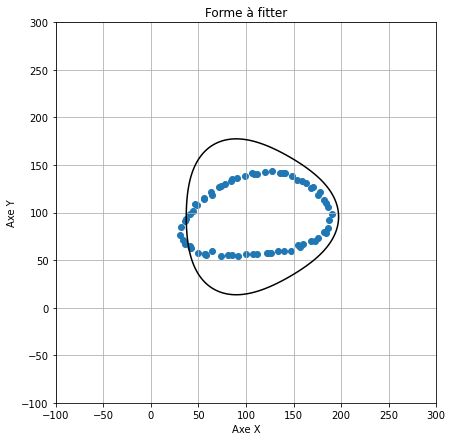

In [7]:
# tester initialisation des paramètres de la HQ 
lambdas = initialise_coefHQ(data_hq1b1[0],data_hq1b1[1],3)
print(lambdas)
x = np.linspace(-500,500,2000)
y = np.linspace(-500,500,2000)
level = 1
plt.figure(figsize=(7,7))
plt.scatter(data_hq1b1[0],data_hq1b1[1])
HQ_trace(lambdas,x,y,level)
plt.grid()
plt.title('Forme à fitter')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.axis([-100,300,-100,300])


**Commentaire:**

L'hyperquadrique ci-dessus correspond à des paramètres $\lambda$ calculés par la fonction $initialise$_$coefH()$. Ces paramètres serviront ensuite lors de l'exécution de l'algorithme comme point de départ du calcul des paramètres optimaux de notre hyperquadrique.

## Implémentation des outils et fonctions

L'objectif est de déterminer le jeu de paramètres 𝜆 , tels que l’hyperquadrique passe au mieux
par le nuage de points. Pour ce faire, il faut définir un critère d’erreur de fit entre le nuage de points et une
hyperquadrique de paramètres donnés, puis déterminer les paramètres qui minimisent ce critère.

On prendra le critère vu lors de la phase 2 que l'on améliorera dans le but d'avoir un meilleur comportement numérique,
et une évaluation plus précise de la distance entre un point $(𝑥, 𝑦)$ et une hyperquadrique donnée.

Une façon simple de pallier le problème de degré élevé du critère consiste à modifier celui-ci en lui
appliquant une fonction monotone qui ne modifiera pas la relation d’ordre entre différentes solutions mais
atténuera les variations.

On introduit alors la fonction $F_{io}(x, y, \lambda)$:

$$
F_{io}(x, y, \lambda) = \varphi(x, y, \lambda)^{\frac{1}{4}} = [\sum_{k=1}^{nH} |A_k.x + B_k.y + C |^{4} ]^{\frac{1}{4}}
$$

La fonction $F_{io}(x, y, \lambda)$ nous servira à implémeter l'erreur de fit qui s'écrit:

$$
EoF(\lambda) = \frac{1}{2}. \sum_{i=1}^{N} [1 - F_{io}(x, y, \lambda) ]^2
$$




In [8]:
def Fio(x,y,lambdas): 
    phi = 0
    for i in range (len(lambdas)):
        phi += abs(lambdas[i][0]*x + lambdas[i][1]*y + lambdas[i][2])**4
    return phi**(1/4)

# cette fonction est utile apres, pendant le calcule des dérivée 
def gio(x,y,lambdas,puissance): 
    phi = 0
    for i in range (len(lambdas)):
        phi += abs(lambdas[i][0]*x + lambdas[i][1]*y + lambdas[i][2])**4
    return phi**(puissance)

### Fonction poids $\omega_i$

Deux points $P1 (x_1, y_1)$, $P2(x_2,y_2)$ peuvent appartenir à la mème isovaleur du critère, sans être à des distances géometrique de l'hyperquadrique. égales.

La quantité $[1 - F_{io}(x, y, \lambda)]$ est un critère de distance. Cette quantité peut être utiliser pour évaluer la distance $d_i$ entre un point de coordonnées $(x, y)$ et un point de l'hyperquadrique de paramètre $\lambda$ tel que:

$$
d_i = \frac{|1 - F_{io}(x_i, y_i, \lambda)|}{|| \nabla F_{io}(x_i, y_i, \lambda) ||}
$$

On définit ainsi un nouveau critère d’erreur de fit $𝐸𝑜𝐹_2$ par :

$$
EoF_2(\lambda) = \frac{1}{2}. \sum_{i=1}^{N} d_i^2 = \sum_{i=1}^{N} \frac{(1 - F_{io}(x_i, y_i, \lambda))^2}{|| \nabla F_{io}(x_i, y_i, \lambda) ||^2}
$$

A partir de cette dernière formule on déduira le terme de poids ccorrespondant à chaque paire $(x_i, y_i)$ tel que:

$$
\omega_i(x_i, y_i, \lambda) = \frac{1 }{|| \nabla F_{io}(x_i, y_i, \lambda) ||^2}
$$


In [9]:
def poids (lambdas,x, y):  
    dFio_dx,dFio_dy=0,0,
    for i in range (len(lambdas)):
        Ak =lambdas[i][0] 
        Bk =lambdas[i][1] 
        Ck =lambdas[i][2]
        dFio_dx +=   Ak * (Ak*x + Bk*y + Ck)**3 
        dFio_dy += Bk * (Ak*x + Bk*y + Ck)**3
       
    dFio_dx = ( dFio_dx *gio(x,y,lambdas,-3/4) )**2
    dFio_dy = ( dFio_dy*gio(x,y,lambdas,-3/4) )**2
    modgradFio2 =  dFio_dx + dFio_dy 

    return (1 /  modgradFio2)

### Fonction $f(x_i, y_i, \lambda) = [1 - F_{io}(x_i, y_i, \lambda)]^2  $

La fonction $f(x_i, y_i, \lambda)$ correpond au calcul de la fonction $[1 - F_{io}(x_i, y_i, \lambda)]^2  $ à un point $P_i(x_i,y_i)$ avec un paramètre $\lambda$ donné.


**Calcul du gradiant de f :**
$$
\nabla f(x_i, y_i, \lambda) = \nabla[1 - F_{io}(x_i, y_i, \lambda)]^2  
$$
avec:

$$
\nabla f(x_i, y_i, \lambda) = 
\begin{pmatrix} \frac{\partial f}{\partial A_1}  \\ \frac{\partial f}{\partial B_1}  \\ \frac{\partial f}{\partial C_1} \\ ... \\ ... \\ \frac{\partial f}{\partial C_{nH}} \end{pmatrix}_{( 3 . nH, 1)}\quad
$$

En calculant les dérivées partiels on retrouve: 
$$
\frac{\partial f}{\partial A_k}  = 2.(-x.(A_k.x + B_k.y + C_k)^3 ). G_{io}(x, y , \lambda, -\frac{3}{4}). (1 - F_{io} (x, y, \lambda))\\
\frac{\partial f}{\partial B_k}  =  2.(-y.(A_k.x + B_k.y + C_k)^3 ). G_{io}(x, y , \lambda, -\frac{3}{4}). (1 - F_{io} (x, y, \lambda))\\
\frac{\partial f}{\partial C_k}  = -2.(A_k.x + B_k.y + C_k)^3 . G_{io}(x, y , \lambda, -\frac{3}{4}). (1 - F_{io} (x, y, \lambda)) \\
$$



In [10]:
def gradf (lambdas,x,y):
    N = len(lambdas)
    gradf = []
    for i in range(N):
        Ak =lambdas[i][0] 
        Bk =lambdas[i][1] 
        Ck =lambdas[i][2]
        
        df_dAk =  2* (-x * (Ak*x + Bk*y + Ck)**3) *gio(x,y,lambdas,-3/4) * (1-Fio(x,y,lambdas))
        df_dBk =  2* (-y * (Ak*x + Bk*y + Ck)**3) *gio(x,y,lambdas,-3/4) * (1-Fio(x,y,lambdas))
        df_dCk =  -2*(Ak*x + Bk*y + Ck)**3 *gio(x,y,lambdas,-3/4)*(1-Fio(x,y,lambdas))
        gradf.append(df_dAk)
        gradf.append(df_dBk)
        gradf.append(df_dCk)
    gradf = np.array(gradf)
    gradf = gradf.reshape(3*N,1)
    
    return gradf

In [11]:
#fonction utile dans la création des élement de la hessienne
def creerdiag(tab1,tab2,imin,imax): #copier tab2 dans tab1[imin:imax,imin:imax]
                                    #tel que tab2 est de taille (3nH,3) et tab1 (3nH,3nH)
                                    
    cpt = 0
    for i in range(imin,imax):
        for k in range(imin,imax):
            tab1[i][k] = tab2[i][cpt]
            cpt = cpt +1
        cpt = 0
    return tab1
    
#fonction utile dans la création des élement de la hessienne la hessienne 
def creermat(tab1,tab2):       #copier tab2 dans tab1 quand élement de tab1 == 0 (valeur dinitialisation de la hessienne)
                               #tel que tab2 est de taille (3nH,3) et tab1 (3nH,3nH)
    m = len(tab1)
    cpt = 0
    for i in range (m):
        for k in range (m):
            if(tab1[i][k]==0):
                tab1[i][k]=tab2[i][cpt]
                cpt = cpt + 1
        cpt = 0
    
    return tab1
            

**Calculde la Hessienne de f:**


La matrice hessienne de f est de taille (3nH x 3nH), tel que:

$$
H(f) = 
\begin{pmatrix}
    \frac{\partial^2 f}{\partial A_1^2} \;\;\; \frac{\partial^2 f}{\partial A_1 \partial B_1} \;\;\;\;\;\;\; .... \;\;\; 
    \frac{\partial^2 f} {\partial A_1\partial C_{nH} } \\
    \frac{\partial^2 f}{\partial B_1 \partial A1} \;\;\; \frac{\partial^2 f}{\partial B_1^2} \;\;\;\;\;\;\; .... \;\;\; 
    \frac{\partial^2 f} {\partial B_1 \partial C_{nH} } \\
    .. \;\;\;\;\;\; .. \;\;\;\;\; \;\;\;\;\;\; .... \;\;\;\;\;.. \\
    .. \;\;\;\;\;\; .. \;\;\;\;\; \;\;\;\; \;\;.... \;\;\;\;\;.. \\
    .. \;\;\;\;\;\; .. \;\;\;\;\; \;\;\;\; \;\;.... \;\;\;\;\;.. \\
    .. \;\;\;\;\;\; .. \;\;\;\;\; \;\;\;\; \;\;.... \;\;\;\;\;.. \\
    \frac{\partial^2 f}{\partial C_{nH} \partial A1} \;\;\; \frac{\partial^2 f}{\partial C_{nH} \partial B1} \;\;\; ... \;\;\; 
    \frac{\partial^2 f} {\partial C_{nH} \partial C_{nH} } \\
\end{pmatrix}_{(3nH x 3nH)} 
$$

prenons par exemple le cas oû nH = 3 :

$$
H(f) =
\begin{pmatrix}
     \boldsymbol{\frac{\partial^2 f}{\partial A_1^2}}  \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial A_1 \partial B_1}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial A_1 \partial C_1}} \;\;\; \frac{\partial^2 f}{\partial A_1 \partial A_2} \;\;\; \frac{\partial^2 f}{\partial A_1 \partial B_2}\;\;\; \frac{\partial^2 f}{\partial A_1 \partial C_2} \;\;\; \frac{\partial^2 f}{\partial A_1 \partial A_3} \;\;\; \frac{\partial^2 f}{\partial A_1 \partial B_3} \;\;\; \frac{\partial^2 f}{\partial A_1 \partial C_3} \\
    \boldsymbol{\frac{\partial^2 f}{\partial B_1 \partial A_1}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial B_1^2}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial B_1 \partial C_1}} \;\;\; \frac{\partial^2 f}{\partial B_1 \partial A_2} \;\;\; \frac{\partial^2 f}{\partial B_1 \partial B_2}\;\;\; \frac{\partial^2 f}{\partial B_1 \partial C_2} \;\;\; \frac{\partial^2 f}{\partial B_1 \partial A_3} \;\;\; \frac{\partial^2 f}{\partial B_1 \partial B_3} \;\;\; \frac{\partial^2 f}{\partial B_1 \partial C_3} \\
    \boldsymbol{\frac{\partial^2 f}{\partial C_1 \partial A_1}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial C_1 \partial B_1}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial C_1^2}} \;\;\; \frac{\partial^2 f}{\partial C_1 \partial A_2} \;\;\; \frac{\partial^2 f}{\partial C_1 \partial B_2}\;\;\; \frac{\partial^2 f}{\partial C_1 \partial C_2} \;\;\; \frac{\partial^2 f}{\partial C_1 \partial A_3} \;\;\; \frac{\partial^2 f}{\partial C_1 \partial B_3} \;\;\; \frac{\partial^2 f}{\partial C_1 \partial C_3} \\
    \frac{\partial^2 f}{\partial A_2 \partial A_1} \;\;\; \frac{\partial^2 f}{\partial A_2 \partial B_1} \;\;\; \frac{\partial^2 f}{\partial A_1 \partial C_1} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial A_2^2}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial A_2 \partial B_2}}\;\;\; \boldsymbol{\frac{\partial^2 f}{\partial A_2 \partial C_2}} \;\;\; \frac{\partial^2 f}{\partial A_2 \partial A_3} \;\;\; \frac{\partial^2 f}{\partial A_2 \partial B_3} \;\;\; \frac{\partial^2 f}{\partial A_2 \partial C_3} \\
    \frac{\partial^2 f}{\partial B_2 \partial A_1} \;\;\; \frac{\partial^2 f}{\partial B_2 \partial B_1} \;\;\; \frac{\partial^2 f}{\partial B_2 \partial C_1} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial B_2 \partial A_2}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial B_2^2}}\;\;\; \boldsymbol{\frac{\partial^2 f}{\partial B_2 \partial C_2}} \;\;\; \frac{\partial^2 f}{\partial B_2 \partial A_3} \;\;\; \frac{\partial^2 f}{\partial B_2 \partial B_3} \;\;\; \frac{\partial^2 f}{\partial B_2 \partial C_3} \\
    \frac{\partial^2 f}{\partial C_2 \partial A_1} \;\;\; \frac{\partial^2 f}{\partial C_2 \partial B_1} \;\;\; \frac{\partial^2 f}{\partial C_2 \partial C1} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial C_2 \partial A_2}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial C_2 \partial B_2}}\;\;\; \boldsymbol{\frac{\partial^2 f}{\partial C_2^2}} \;\;\; \frac{\partial^2 f}{\partial C_2 \partial A_3} \;\;\; \frac{\partial^2 f}{\partial C_2 \partial B_3} \;\;\; \frac{\partial^2 f}{\partial C_2 \partial C_3} \\
    \frac{\partial^2 f}{\partial A_3 \partial A_1} \;\;\; \frac{\partial^2 f}{\partial A_3 \partial B_1} \;\;\; \frac{\partial^2 f}{\partial A_3 \partial C_1} \;\;\; \frac{\partial^2 f}{\partial A_3 \partial A_2} \;\;\; \frac{\partial^2 f}{\partial A_3 \partial B_2}\;\;\; \frac{\partial^2 f}{\partial A_3 \partial C_2} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial A_3^2}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial A_3 \partial B_3}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial A_3 \partial C_3}} \\
    \frac{\partial^2 f}{\partial B_3 \partial A_1} \;\;\; \frac{\partial^2 f}{\partial B_3 \partial B_1} \;\;\; \frac{\partial^2 f}{\partial B_3 \partial C_1} \;\;\; \frac{\partial^2 f}{\partial B_3 \partial A_2} \;\;\; \frac{\partial^2 f}{\partial B_3 \partial B_2}\;\;\; \frac{\partial^2 f}{\partial B_3 \partial C_2} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial B_3 \partial A_3}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial B_3^2}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial B_3 \partial C_3}} \\
    \frac{\partial^2 f}{\partial C_3 \partial A_1} \;\;\; \frac{\partial^2 f}{\partial C_3 \partial B_1} \;\;\; \frac{\partial^2 f}{\partial C_3 \partial C1} \;\;\; \frac{\partial^2 f}{\partial C_3 \partial A_2} \;\;\; \frac{\partial^2 f}{\partial C_3 \partial B_2}\;\;\; \frac{\partial^2 f}{\partial C_3 \partial C_2} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial C_3 \partial A_3}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial C_3 \partial B_3}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial C_3^2}} \\
\end{pmatrix}_{(3nH x 3nH)} 
$$

**Algorithme de calcul de la matrice Hessienne de f:**


Tout d'abord on commence par calculer  les termes de la matrice **hessF1**  de taille (3nH x 3 ) qui se calculent d'une manière similaire. Puis on calculera les élements de la matrice **hessF2** de taille (3nh x 6) qui contient le reste des élements de la matrice Hessienne de f.

Apres, on appelle les fonction **creerdiag(...)** et **creermat(...)** pour assembler **hessF1** et **hessF2**, ce qui donne la matrice hessienne H(f). 

par exemple, si nH = 3:

$
HessF1 =
\begin{pmatrix}
    \boldsymbol{\frac{\partial^2 f}{\partial A_1^2}}  \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial A_1 \partial B_1}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial A_1 \partial C_1}} \\
    \boldsymbol{\frac{\partial^2 f}{\partial B_1 \partial A_1}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial B_1^2}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial B_1 \partial C_1}}  \\
    \boldsymbol{\frac{\partial^2 f}{\partial C_1 \partial A_1}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial C_1 \partial B_1}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial C_1^2}} \\
    \boldsymbol{\frac{\partial^2 f}{\partial A_2^2}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial A_2 \partial B_2}}\;\;\; \boldsymbol{\frac{\partial^2 f}{\partial A_2 \partial C_2}} \\
    \boldsymbol{\frac{\partial^2 f}{\partial B_2 \partial A_2}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial B_2^2}}\;\;\; \boldsymbol{\frac{\partial^2 f}{\partial B_2 \partial C_2}}  \\
    \boldsymbol{\frac{\partial^2 f}{\partial C_2 \partial A_2}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial C_2 \partial B_2}}\;\;\; \boldsymbol{\frac{\partial^2 f}{\partial C_2^2}}  \\
    \boldsymbol{\frac{\partial^2 f}{\partial A_3^2}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial A_3 \partial B_3}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial A_3 \partial C_3}}  \\
    \boldsymbol{\frac{\partial^2 f}{\partial B_3 \partial A_3}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial B_3^2}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial B_3 \partial C_3}}  \\
    \boldsymbol{\frac{\partial^2 f}{\partial C_3 \partial A_3}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial C_3 \partial B_3}} \;\;\; \boldsymbol{\frac{\partial^2 f}{\partial C_3^2}} \\
\end{pmatrix}_{(9 x 3)}
$
$
HessF2 = 
\begin{pmatrix}
    \frac{\partial^2 f}{\partial A_1 \partial A_2} \;\;\; \frac{\partial^2 f}{\partial A_1 \partial B_2}\;\;\; \frac{\partial^2 f}{\partial A_1 \partial C_2} \;\;\; \frac{\partial^2 f}{\partial A_1 \partial A_3} \;\;\; \frac{\partial^2 f}{\partial A_1 \partial B_3} \;\;\; \frac{\partial^2 f}{\partial A_1 \partial C_3} \\
    \frac{\partial^2 f}{\partial B_1 \partial A_2} \;\;\; \frac{\partial^2 f}{\partial B_1 \partial B_2}\;\;\; \frac{\partial^2 f}{\partial B_1 \partial C_2} \;\;\; \frac{\partial^2 f}{\partial B_1 \partial A_3} \;\;\; \frac{\partial^2 f}{\partial B_1 \partial B_3} \;\;\; \frac{\partial^2 f}{\partial B_1 \partial C_3}  \\
    \frac{\partial^2 f}{\partial C_1 \partial A_2} \;\;\; \frac{\partial^2 f}{\partial C_1 \partial B_2}\;\;\; \frac{\partial^2 f}{\partial C_1 \partial C_2} \;\;\; \frac{\partial^2 f}{\partial C_1 \partial A_3} \;\;\; \frac{\partial^2 f}{\partial C_1 \partial B_3} \;\;\; \frac{\partial^2 f}{\partial C_1 \partial C_3} \\
    \frac{\partial^2 f}{\partial A_2 \partial A_1} \;\;\; \frac{\partial^2 f}{\partial A_2 \partial B_1} \;\;\; \frac{\partial^2 f}{\partial A_1 \partial C_1} \;\;\; \frac{\partial^2 f}{\partial A_2 \partial A_3} \;\;\; \frac{\partial^2 f}{\partial A_2 \partial B_3} \;\;\; \frac{\partial^2 f}{\partial A_2 \partial C_3} \\
    \frac{\partial^2 f}{\partial B_2 \partial A_1} \;\;\; \frac{\partial^2 f}{\partial B_2 \partial B_1} \;\;\; \frac{\partial^2 f}{\partial B_2 \partial C_1} \;\;\; \frac{\partial^2 f}{\partial B_2 \partial A_3} \;\;\; \frac{\partial^2 f}{\partial B_2 \partial B_3} \;\;\; \frac{\partial^2 f}{\partial B_2 \partial C_3} \\
    \frac{\partial^2 f}{\partial C_2 \partial A_1} \;\;\; \frac{\partial^2 f}{\partial C_2 \partial B_1} \;\;\; \frac{\partial^2 f}{\partial C_2 \partial C1} \;\;\;\frac{\partial^2 f}{\partial C_2 \partial A_3} \;\;\; \frac{\partial^2 f}{\partial C_2 \partial B_3} \;\;\; \frac{\partial^2 f}{\partial C_2 \partial C_3} \\
    \frac{\partial^2 f}{\partial A_3 \partial A_1} \;\;\; \frac{\partial^2 f}{\partial A_3 \partial B_1} \;\;\; \frac{\partial^2 f}{\partial A_3 \partial C_1} \;\;\; \frac{\partial^2 f}{\partial A_3 \partial A_2} \;\;\; \frac{\partial^2 f}{\partial A_3 \partial B_2}\;\;\; \frac{\partial^2 f}{\partial A_3 \partial C_2} \\
    \frac{\partial^2 f}{\partial B_3 \partial A_1} \;\;\; \frac{\partial^2 f}{\partial B_3 \partial B_1} \;\;\; \frac{\partial^2 f}{\partial B_3 \partial C_1} \;\;\; \frac{\partial^2 f}{\partial B_3 \partial A_2} \;\;\; \frac{\partial^2 f}{\partial B_3 \partial B_2}\;\;\; \frac{\partial^2 f}{\partial B_3 \partial C_2} \\
    \frac{\partial^2 f}{\partial C_3 \partial A_1} \;\;\; \frac{\partial^2 f}{\partial C_3 \partial B_1} \;\;\; \frac{\partial^2 f}{\partial C_3 \partial C1} \;\;\; \frac{\partial^2 f}{\partial C_3 \partial A_2} \;\;\; \frac{\partial^2 f}{\partial C_3 \partial B_2}\;\;\; \frac{\partial^2 f}{\partial C_3 \partial C_2} \\
    \end{pmatrix}_{(9 x 6)}
$

**Remarque:**

Il existe une méthode simplifiée pour calculer les valeurs de la matrice Hessienne de f, mais vu la compléxité du problème traité, nous avons décidé de calculer directement les dérivées d'ordre 2 pour une meilleure précision.

In [12]:
# f = (1-FIO)^2
def hessf(lambdas, x, y): 
    N = 3*len(lambdas)
    hessF1 = []  # Matrice de taille (3*nH,3) -------> apres exécution
                 #chaque 3 lignes ont la forme suivante : [[d2f/d2Ak    d2f/dAkBk   d2f/dAkck],
                 #                                        [d2f/dBkAk   d2f/d2Bk   d2f/dBkCk],
                 #                                        [d2f/dCkAk    d2f/dCkBk   d2f/d2Ck]]
                 # pour chaque 3 lignes la forme des dérives est pareil, il faut just changer les parametres Ak Bk Ck tout dépend 
                 # le terme : nh
                
    hessF2 = [[]]*N    # Matrice de taille (3*nH) ------> apres execusion
                       # chaque 3 lignes ont la forme suivante:[[d2f/dAkAk'    d2f/dAkBk'   d2f/dAkCk'  d2f/dAkAk"    d2f/dAkBk"   d2f/dAkCk"],
                       #                                       [d2f/dBkAk'   d2f/dBkBk'   d2f/dBkCk'   d2f/dBkAk"   d2f/dBkBk"   d2f/dBkCk"]
                       #                                      [d2f/dCkAk'    d2f/dCkBk'   d2f/dCkCk'  d2f/dCkAk"    d2f/dCkBk"   d2f/dCkCk"]]
                       #                                      
                       #                                     tel que indice  les k, k',k" sont différent
                         
    ligne = 0
    for i in range(len(lambdas)): #nh = i
        
        Ak =lambdas[i][0] 
        Bk =lambdas[i][1] 
        Ck =lambdas[i][2]
        
        # à chaque itération i on ajoute 3 lignes à la Matrice hessF1
        ####################
        df2_da2 = 6*x**(2)*(Ak*x+Bk*y+Ck)**(6) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*x**(2) *(Ak*x+Bk*y+Ck)**(6)*gio(x,y,lambdas,-3/2) - 6*x**(2) *(Ak*x+Bk*y+Ck)**(2)*(1-Fio(x,y,lambdas))*gio(x,y,lambdas,-3/4)  
        df2_dab = 6*x*y*(Ak*x+Bk*y+Ck)**(6) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*x*y*(Ak*x+Bk*y+Ck)**(6)*gio(x,y,lambdas,-3/2) - 6*x*y*(Ak*x+Bk*y+Ck)**(2)*(1-Fio(x,y,lambdas))*gio(x,y,lambdas,-3/4)
        df2_dac = 6*x*(Ak*x+Bk*y+Ck)**(6) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*x*(Ak*x+Bk*y+Ck)**(6)*gio(x,y,lambdas,-3/2) - 6*x*(Ak*x+Bk*y+Ck)**(2)*(1-Fio(x,y,lambdas))*gio(x,y,lambdas,-3/4)
        hessF1.append([df2_da2,df2_dab,df2_dac])

        df2_db2 = 6*y**(2)*(Ak*x+Bk*y+Ck)**(6) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*y**(2) *(Ak*x+Bk*y+Ck)**(6)*gio(x,y,lambdas,-3/2) - 6*y**(2) *(Ak*x+Bk*y+Ck)**(2)*(1-Fio(x,y,lambdas))*gio(x,y,lambdas,-3/4)  
        df2_dba = 6*x*y*(Ak*x+Bk*y+Ck)**(6) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*x*y*(Ak*x+Bk*y+Ck)**(6)*gio(x,y,lambdas,-3/2) - 6*x*y*(Ak*x+Bk*y+Ck)**(2)*(1-Fio(x,y,lambdas))*gio(x,y,lambdas,-3/4)
        df2_dbc = 6*y*(Ak*x+Bk*y+Ck)**(6) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*y*(Ak*x+Bk*y+Ck)**(6)*gio(x,y,lambdas,-3/2) - 6*y*(Ak*x+Bk*y+Ck)**(2)*(1-Fio(x,y,lambdas))*gio(x,y,lambdas,-3/4)
        hessF1.append([df2_dba,df2_dab,df2_dbc])

        df2_dc2 = 6*(Ak*x+Bk*y+Ck)**(6) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*(Ak*x+Bk*y+Ck)**(6)*gio(x,y,lambdas,-3/2) - 6 *(Ak*x+Bk*y+Ck)**(2)*(1-Fio(x,y,lambdas))*gio(x,y,lambdas,-3/4)  
        df2_dca = 6*x*(Ak*x+Bk*y+Ck)**(6) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*x*(Ak*x+Bk*y+Ck)**(6)*gio(x,y,lambdas,-3/2) - 6*x*(Ak*x+Bk*y+Ck)**(2)*(1-Fio(x,y,lambdas))*gio(x,y,lambdas,-3/4)
        df2_dcb = 6*y*(Ak*x+Bk*y+Ck)**(6) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*y*(Ak*x+Bk*y+Ck)**(6)*gio(x,y,lambdas,-3/2) - 6*y*(Ak*x+Bk*y+Ck)**(2)*(1-Fio(x,y,lambdas))*gio(x,y,lambdas,-3/4)
        hessF1.append([df2_dca,df2_dcb,df2_dc2])
        ####################
        
        # chaque boucle au dessous, nous permet d'ajouter une ligne avec six élement à la matrice hessF2
        # au totale il ya trois boucle, d'ou apres leurs éxécution, trois ligne seront ajouter à la matrice hessF2
        for k in range (len(lambdas)): 
            
            if (k !=i): # pour parcourir les parametres A, B et c des autres termes différent de nH = i
                Ak2 =lambdas[k][0] 
                Bk2 =lambdas[k][1] 
                Ck2 =lambdas[k][2]
                df_a1a2 = 6*x**(2)*(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*x**(2) *(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3)*gio(x,y,lambdas,-3/2)
                
                df_a1b2 = 6*x*y*(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*x*y *(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3)*gio(x,y,lambdas,-3/2)
                
                df_a1c2 = 6*x*(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*x*(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3)*gio(x,y,lambdas,-3/2)
                if len(hessF2[ligne])==0:
                    hessF2[ligne]=[df_a1a2,df_a1b2,df_a1c2]
                else:
                    hessF2[ligne].append(df_a1a2)
                    hessF2[ligne].append(df_a1b2)
                    hessF2[ligne].append(df_a1c2)
        
        ligne = ligne +1   
        for k in range (len(lambdas)): 

            if (k !=i):# pour parcourir les parametres A, B et c des autres termes différent de nH = i
                Ak2 =lambdas[k][0] 
                Bk2 =lambdas[k][1] 
                Ck2 =lambdas[k][2]
                df_b1b2 = 6*y**(2)*(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*y**(2) *(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3)*gio(x,y,lambdas,-3/2)
                
                df_b1a2 = 6*x*y*(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*x*y *(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3)*gio(x,y,lambdas,-3/2)
                
                df_b1c2 = 6*y*(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*y*(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3)*gio(x,y,lambdas,-3/2)
                if len(hessF2[ligne])==0:
                    hessF2[ligne]=[df_b1a2,df_b1b2,df_b1c2]
                else:
                    hessF2[ligne].append(df_b1a2)
                    hessF2[ligne].append(df_b1b2)
                    hessF2[ligne].append(df_b1c2)
        
        ligne = ligne +1
        for k in range (len(lambdas)):

            if (k !=i):# pour parcourir les parametres A, B et c des autres termes différent de nh = i
                Ak2 =lambdas[k][0] 
                Bk2 =lambdas[k][1] 
                Ck2 =lambdas[k][2]
                df_c1c2 = 6*(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3)*gio(x,y,lambdas,-3/2)
                
                df_c1a2 = 6*x*(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*x*(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3)*gio(x,y,lambdas,-3/2)
                
                df_c1b2 = 6*y*(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3) * (1-Fio(x,y,lambdas))*gio(x,y,lambdas,-7/4) + 2*y*(Ak*x+Bk*y+Ck)**(3)*(Ak2*x+Bk2*y+Ck2)**(3)*gio(x,y,lambdas,-3/2)
                
                if len(hessF2[ligne])==0:
                    hessF2[ligne]=[df_c1a2,df_c1b2,df_c1c2]
                else:
                    hessF2[ligne].append(df_c1a2)
                    hessF2[ligne].append(df_c1b2)
                    hessF2[ligne].append(df_c1c2)
        ligne = ligne + 1    
        #on refait le calcul jusqu'a obtention de la matrice  hessF1 et hessF2
    
    hess = np.zeros((N, N)) #initialisation de la matrice hessienne dont on veut calculer les éléments
    hessF1 = np.array(hessF1)
    hessF2 = np.array(hessF2)
    
    #appelle des fonction creerdiag(...) et creermat(...), qui nous permet de manipuler hessF1 et hessF2
    # pour obtenir la matrice hessienne exacte avec le bon triage des éléments
    for i in range(len(lambdas)):
        hess = creerdiag(hess,hessF1,i*3,i*3+3)
    hess = creermat(hess,hessF2)
    
    return hess

### Foncion Pénalité  $P_k$ 

Pour prendre en considération les contraintes liées aux conditions sur les droites englobantes, un terme de pénalité est rajouté au critère à minimiser qui est de la forme:

$$
P_k(\lambda) = ( max(0, \mu_1 - (A_k^2 + B_k^2)))^2 + ( max(0, (A_k^2 + B_k^2) - \mu_2))^2 
$$

In [13]:
def penalite (lamda,mu1, mu2):  
    p = (max(0, mu1 - (lamda[0]**2 + lamda[1]**2 )) )**2 + (max (0, (lamda[0]**2 + lamda[1]**2)-mu2 ))**2
    return p

def sommePenalite (lambdas,mu1, mu2): 
    p = 0
    for i in range (len(lambdas)):
        p += penalite(lambdas[i],mu1, mu2)
    return p

**Calcul du gradiant du terme de pénalité $P_k(\lambda)$**:

$$
\nabla P_k(\lambda) = 
\begin{pmatrix} \frac{\partial f}{\partial A_1}  \\ \frac{\partial f}{\partial B_1}  \\ \frac{\partial f}{\partial C_1} \\ ... \\ ... \\ \frac{\partial f}{\partial C_{nH}} \end{pmatrix}_{( 3 . nH, 1)}\quad
$$

Avec:

$$
\frac{\partial P_k}{\partial A_k} (\lambda) = 4.A_k. [max(0, \mu_1 - (A_k^2 + B_k^2)) + max(0,(A_k^2 + B_k^2) - \mu2)]  \\
\frac{\partial P_k}{\partial B_k} (\lambda) = 4.B_k. [max(0, \mu_1 - (A_k^2 + B_k^2)) + max(0,(A_k^2 + B_k^2) - \mu2)  \\
$$

Toutes les autres dérivées partielles sont nulles.


In [14]:
def gradPenalite(lambdas, mu1, mu2): #verifié
    gradP = []
    N = len(lambdas)
    for ligne in range(N):
        Ak = lambdas[ligne][0]
        Bk = lambdas[ligne][1]
        dPk_dAk = 4*Ak* (-max(0, mu1 - (Ak**2 + Bk**2)) + max(0, (Ak**2 + Bk**2) - mu2))
        dPk_dBk = 4*Bk* (-max(0, mu1 - (Ak**2 + Bk**2)) + max(0, (Ak**2 + Bk**2) - mu2))
        dPk_dCk = 0
        gradP.append(dPk_dAk)
        gradP.append(dPk_dBk)
        gradP.append(dPk_dCk)
    gradP = np.array(gradP)
    gradP = gradP.reshape(3*N,1)
    return gradP

**Calcul de la Hessienne du terme de pénalité $P_k(\lambda)$**:

$$
HP_k(\lambda) = 
\begin{pmatrix}
    \frac{\partial^2 P_k}{\partial A_1^2} \;\;\; \frac{\partial^2 P_k}{\partial A_1 \partial B_1} \;\;\;\;\;\;\; .... \;\;\; 
    \frac{\partial^2 P_k} {\partial A_1 \partial C_{nH} } \\
    \frac{\partial^2 P_k}{\partial B_1 \partial A_1} \;\;\; \frac{\partial^2 P_k}{\partial B_1^2} \;\;\;\;\;\;\; .... \;\;\; 
    \frac{\partial^2 P_k} {\partial B_1 \partial C_{nH} } \\
    .. \;\;\;\;\;\; .. \;\;\;\;\; \;\;\;\;\;\; .... \;\;\;\;\;.. \\
    . \;\;\;\;\;\; .. \;\;\;\;\; \;\;\;\;\;\; .... \;\;\;\;\;.. \\
    . \;\;\;\;\;\; .. \;\;\;\;\; \;\;\;\;\;\; .... \;\;\;\;\;.. \\
    . \;\;\;\;\;\; .. \;\;\;\;\; \;\;\;\;\;\; .... \;\;\;\;\;.. \\
    \frac{\partial^2 P_k}{\partial C_{nH} \partial A_1} \;\;\; \frac{\partial^2 f}{\partial C_{nH} \partial B_1} \;\;\; ... \;\;\; 
    \frac{\partial^2 P_k} {\partial C_{nH} \partial C_{nH} } \\
\end{pmatrix}_{(3nH x 3nH)} 
$$

Avec:

$$
\frac{\partial^2 P_k}{\partial A_k^2} (\lambda) = 4.[-max(0, \mu_1 - (A_k^2 + B_k^2)) + max(0,(A_k^2 + B_k^2) - \mu2)] + 8.A_k^2[sign(max(0, \mu_1 - (A_k^2 + B_k^2))) + sign(max(0,(A_k^2 + B_k^2) - \mu2))]   \\
\frac{\partial^2 P_k}{\partial B_k^2} (\lambda) = 4.[-max(0, \mu_1 - (A_k^2 + B_k^2)) + max(0,(A_k^2 + B_k^2) - \mu2)] + 8.B_k^2[sign(max(0, \mu_1 - (A_k^2 + B_k^2))) + sign(max(0,(A_k^2 + B_k^2) - \mu2))]    \\
\frac{\partial^2 P_k}{\partial A_k.\partial B_k} =  \frac{\partial^2 P_k}{\partial B_k.\partial A_k}= 8.A_k.B_k[sign(max(0, \mu_1 - (A_k^2 + B_k^2))) + sign(max(0,(A_k^2 + B_k^2) - \mu2))]    \\
$$

Toutes les autres dérivées partielles sont nulles.


In [15]:
def hessiennePenalite (lambdas,u1,u2): 
    hessPk =[]
    N = 3*len(lambdas)
    hesspena = np.zeros((N,N))
    for ligne in range(len(lambdas)):
        a = lambdas[ligne][0]
        b = lambdas[ligne][1]
        dp2_da2 = 4 *( -max(0,u1 - (a**2+b**2)) + max(0,(a**2 + b**2) - u2))  + 8*a**2 * (np.sign(max(0,u1-(a**2+b**2)) ) + np.sign(max(0,(a**2+b**2)- u2)))
        dp2_db2 = 4 *( -max(0,u1 - (a**2+b**2)) + max(0,(a**2 + b**2) - u2))  + 8*b**2 * (np.sign(max(0,u1-(a**2+b**2)) ) + np.sign(max(0,(a**2+b**2)- u2))) 
        dp2_dbda = 8*a*b*( np.sign(max(0,u1-(a**2+b**2))) + np.sign(max(0,(a**2+b**2)-u2)))
        dp2_dadb = dp2_dbda
        hessPk.append([dp2_da2, dp2_dadb, 0])
        hessPk.append([dp2_dbda, dp2_db2, 0])
        hessPk.append([0, 0, 0])
    hessPk = np.array(hessPk)
    for i in range(len(lambdas)):
        hesspena = creerdiag(hesspena,hessPk,i*3,i*3+3)
    return hesspena



## Critère à minimiser

Le critère à minimiser correspond à:
    
$$
J(x,y, \lambda) = 
\frac{1}{2}. \sum_{i=1}^{N} \omega_i[1 - F_{io}(x_i, y_i, \lambda) ]^2 + \nu. \sum_{k=1}^{nH} P_k(x,y,\lambda)
$$

In [16]:
def critere (lambdas,v, mu1, mu2, x,y):#verifié
    J = 0
    for i in range (len(x)):
        J += poids ( lambdas,x[i], y[i]) * ( 1- Fio(x[i],y[i],lambdas))**2 
    Pk = sommePenalite (lambdas,mu1, mu2)
    J = 0.5*J + v * Pk
    return J

**Calcul du gradiant du critère $\nabla J(x, y, \lambda)$:**
$$
\nabla J(x,y, \lambda) = 
\frac{1}{2}. \sum_{i=1}^{N} (\omega_i; \nabla f(x_i, y_i, \lambda)) + \nu.\nabla P_k(x,y,\lambda)
$$

avec:

$$
f(x_i, y_i, \lambda) = [1 - F_{io}(x_i, y_i, \lambda)]^2
$$

In [17]:
def gradCritere(lambdas, v,  mu1, mu2, x, y): #verifié
    
    # Calcul du gradiant de la fonction Pk:
    gradPk = gradPenalite(lambdas, mu1, mu2)
    
    # Calcul du gradiant de la fonction f
    N = 3*len(lambdas)
    gradF = np.zeros([N,1])
    for i in range(len(x)):
        w = poids (lambdas,x[i], y[i])
        #for k in range(N):
        gradF += w*gradf(lambdas,x[i], y[i]) 
    gradJ = 0.5 *gradF + v* gradPk

    return gradJ

**Calcul de la Hessienne du critère $HJ(x, y, \lambda)$**:

$$
HJ(x,y, \lambda) = 
\frac{1}{2}. \sum_{i=1}^{N} (\omega_i; Hf(x_i, y_i, \lambda)) + \nu.HP_k(x,y,\lambda)
$$

In [18]:
def hessienneCritere (lambdas, v,  u1, u2, x, y):
    # Calcul de la Hessienne de la pénalité
    hessPk = hessiennePenalite (lambdas,u1,u2)
    N = len(lambdas)
    hessF = np.zeros([3*N,3*N])
    for i in range(len(x)):
        w=poids (lambdas, x[i], y[i])
        hessF += w*hessf(lambdas,x[i], y[i]) 
        
    hessJ = 0.5 *hessF + v* hessPk
    h = hessJ
    
        
    
    return  h

## Implémentation de l'algorithme de Levenberg-Marquardt:

L'algorithme de Levenberg-Marquard ou bien algorithme LM est utilisé pour minimiser une fonction souvent non linéaire et dépend de plusieurs variables, il permet d'obtenir une solution numérique.
il repose sur la méthode de descente de gradient et la méthode de Newton, 

**Algorithme**

Choix des paramètres de l'algorithme: 
+ $\lambda_0$ : paramètres initiales de HQ
+ $\epsilon$ : précision
+ $n_{max}$ : nombre d'itérations maximale

Initialisation :
+ $\lambda_{n-1} \xleftarrow{} \lambda_0$
+ $d\lambda \xleftarrow{} 1$
+ $ n \xleftarrow{}  0 $
+ $ \beta \xleftarrow{}  0.01 $
+ $\beta$ : pour une  grande valeur de $\beta$ la résolution de système est proche de la méthode de déscente de gradient, et pour les petites valeurs, on s'approche de la méthode de Newton.

Tant que $ d\lambda > \epsilon \;\; et \;\; n < n_{max} :$
+ $\nabla J_{n-1}$ = $\nabla J_{n-1}$
+ $ HJ_{n-1} = HJ_{n-1} $
+ $\Delta \lambda$ Solution du système linéaire : $(HJ_{n-1} + \beta I).\Delta \lambda = - \nabla J_{n-1}  $ ......(*)
+ $Calculer J(\lambda_{n-1}  + \Delta \lambda ) $
+ $Tant que  \; J(\lambda_{n-1}  + \Delta \lambda ) > J(\lambda_{n-1}) \xrightarrow{} \beta = \beta\; x \;10 $ et aller en (*)
+ $ \beta = 0.1\beta $
+ $ \lambda_{n_1} = \lambda_{n_1} + \Delta \lambda $
+ $d\lambda = ||\Delta \lambda || $
+ $n \xleftarrow{} n + 1$

converge si  $ \xleftarrow{} (d\lambda \leq eps)$

In [19]:
def Levenberg_Marquardt (lamda0, eps, nmax,v, mu1, mu2, x, y):
    # initialisation des paramètres
    nH = len(lamda0)
    lamdan_1 = np.array(lamda0[:,:3])
    lam = np.array([])
    dlamda = 1
    n = 0
    beta = 0.01

    while dlamda > eps and n < nmax:
        # Calcul du gradiant
        gradJn_1 = gradCritere(lamdan_1,v, mu1, mu2, x, y)
        
        # Calcul de la matrice Hessienne
        hessJn_1 = hessienneCritere (lamdan_1,v, mu1, mu2, x, y)
        
        # Calcul des solutions du systèmes linéaire
        delta_lam = np.linalg.solve( hessJn_1 + beta*np.eye(3*nH),-gradJn_1)
        #print(delta_lam)
        delta_lam = delta_lam.reshape([len(delta_lam)//3, 3])
        
        while critere(lamdan_1 + delta_lam, v, mu1, mu2, x, y) >= critere(lamdan_1, v, mu1, mu2, x, y):
            beta = 10*beta
            delta_lam = np.linalg.solve( hessJn_1 + beta*np.eye(3*nH), -gradJn_1)
            
            delta_lam = delta_lam.reshape([len(delta_lam)//3, 3])
                               
        
        beta = 0.1*beta
        lamdan_1 = lamdan_1 + delta_lam
        dlamda = np.linalg.norm(delta_lam)
        #print(critere(lamdan_1, v, mu1, mu2, x, y ))
        print(f'n = {n},     dlamd = {dlamda}')
        n = n + 1
    # Ajouter les gamma a la solution
    gamma = [[4]]*nH 
    gamma = np.array(gamma)
    lam1 = np.append(lamdan_1,gamma, axis = 1)
                                                                                   
    return lam1, n           

In [20]:
# Paramètres:
v = 10**(8)
k1 = 10
k2 = 10
eps = 10**(-6)
nmax = 60

########################################################################
#hq1b1
x = np.array(data_hq1b1[0]) 
y = np.array(data_hq1b1[1])
# Calcul de smin et smax
xG, yG = np.mean(x), np.mean(y)
smax = 2 * np.sqrt( np.max( (x - xG)**2 + (y - yG)**2 ) )
smin = 2 * np.sqrt( np.min( (x - xG)**2 + (y - yG)**2 ) )

# Paramètres:
mu1 = (2/(k1*smax))**2
mu2 = (2/(k2*smin))**2

# Test algorithme
lamda = initialise_coefHQ(x,y,3)
lamda1nh3, n1nh3 = Levenberg_Marquardt (lamda, eps, nmax,v, mu1, mu2, x, y)

lamda = initialise_coefHQ(x,y,4)
lamda1nh4, n1nh4 = Levenberg_Marquardt (lamda, eps, nmax,v, mu1, mu2, x, y)

lamda = initialise_coefHQ(x,y,5)
lamda1nh5, n1nh5 = Levenberg_Marquardt (lamda, eps, nmax,v, mu1, mu2, x, y)

########################################################################
#hq2b1
x = np.array(data_hq2b1[0])
y = np.array(data_hq2b1[1])
# Calcul de smin et smax
xG, yG = np.mean(x), np.mean(y)
smax = 2 * np.sqrt( np.max( (x - xG)**2 + (y - yG)**2 ) )
smin = 2 * np.sqrt( np.min( (x - xG)**2 + (y - yG)**2 ) )

# Paramètres:
mu1 = (2/(k1*smax))**2
mu2 = (2/(k2*smin))**2

# Test algorithme
lamda = initialise_coefHQ(x,y,3)
lamda2nh3, n2nh3 = Levenberg_Marquardt (lamda, eps, nmax,v, mu1, mu2, x, y)

lamda = initialise_coefHQ(x,y,4)
lamda2nh4, n2nh4 = Levenberg_Marquardt (lamda, eps, nmax,v, mu1, mu2, x, y)

lamda = initialise_coefHQ(x,y,5)
lamda2nh5, n2nh5 = Levenberg_Marquardt (lamda, eps, nmax,v, mu1, mu2, x, y)


n = 0,     dlamd = 1.5444809523415939
n = 1,     dlamd = 0.2879568624886104
n = 2,     dlamd = 0.0881396876340146
n = 3,     dlamd = 0.2628167883096124
n = 4,     dlamd = 0.08081346423537074
n = 5,     dlamd = 0.18389906552598434
n = 6,     dlamd = 0.08982897414762232
n = 7,     dlamd = 0.11748464735635353
n = 8,     dlamd = 7.499613516913397e-18
n = 0,     dlamd = 6.200519122388167
n = 1,     dlamd = 4.386452181834906
n = 2,     dlamd = 0.5028887003424689
n = 3,     dlamd = 0.2602047948266014
n = 4,     dlamd = 0.012332178087469677
n = 5,     dlamd = 0.09743466201674002
n = 6,     dlamd = 0.23762161004062146
n = 7,     dlamd = 0.2333093551519832
n = 8,     dlamd = 0.16510895189687883
n = 9,     dlamd = 0.14697746314267895
n = 10,     dlamd = 1.2404675958848144e-05
n = 11,     dlamd = 1.1107757249627716e-05
n = 12,     dlamd = 1.0298613696634569e-05
n = 13,     dlamd = 9.776536684351532e-06
n = 14,     dlamd = 9.401751164273722e-06
n = 15,     dlamd = 9.102164103906669e-06
n = 16,     

n = 9,     dlamd = 0.023255918239777573
n = 10,     dlamd = 0.14350878348910878
n = 11,     dlamd = 0.039853059709414204
n = 12,     dlamd = 0.08469043648832777
n = 13,     dlamd = 0.06716372904029995
n = 14,     dlamd = 0.04741823764333976
n = 15,     dlamd = 0.012857228696633543
n = 16,     dlamd = 0.007274668895829965
n = 17,     dlamd = 0.003404334506183482
n = 18,     dlamd = 0.004979221514864929
n = 19,     dlamd = 0.00502407765737545
n = 20,     dlamd = 0.0048571663003319845
n = 21,     dlamd = 0.004661523289162357
n = 22,     dlamd = 0.004474888419401563
n = 23,     dlamd = 0.004304188899953537
n = 24,     dlamd = 0.004149636136323636
n = 25,     dlamd = 0.004010251413036331
n = 26,     dlamd = 0.0038849702656515994
n = 27,     dlamd = 0.0037728900816623723
n = 28,     dlamd = 0.003673313024648436
n = 29,     dlamd = 0.0035857424466180236
n = 30,     dlamd = 0.003509862003236992
n = 31,     dlamd = 0.0034455038063855945
n = 32,     dlamd = 0.0033926077043637064
n = 33,     dlam

(-100.0, 300.0, -100.0, 300.0)

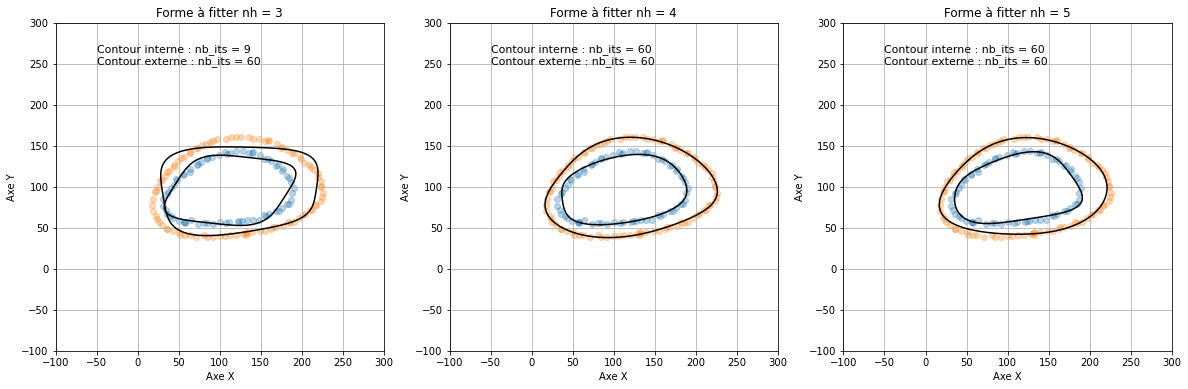

In [21]:
x0 = np.linspace(-500,500,2000)
y0 = np.linspace(-500,500,2000)
level = 1

plt.figure(figsize=(20,60))
plt.subplot(1,3,1)
plt.scatter(data_hq1b1[0],data_hq1b1[1], alpha = 0.3)
HQ_trace(lamda1nh3,x0,y0,level)
plt.scatter(data_hq2b1[0],data_hq2b1[1],alpha = 0.3)
HQ_trace(lamda2nh3,x0,y0,level)
plt.grid()
plt.title('Forme à fitter nh = 3')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.text(-50,250,f"Contour interne : nb_its = {n1nh3}\nContour externe : nb_its = {n2nh3}", fontsize = 11)
plt.axis([-100,300,-100,300])

###################################
plt.subplot(1,3,2)
plt.scatter(data_hq1b1[0],data_hq1b1[1],alpha = 0.3)
HQ_trace(lamda1nh4,x0,y0,level)
plt.scatter(data_hq2b1[0],data_hq2b1[1],alpha = 0.3)
HQ_trace(lamda2nh4,x0,y0,level)
plt.grid()
plt.title('Forme à fitter nh = 4')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.text(-50,250,f"Contour interne : nb_its = {n1nh4}\nContour externe : nb_its = {n2nh4}", fontsize = 11)
plt.axis([-100,300,-100,300])

######################################
plt.subplot(1,3,3)
plt.scatter(data_hq1b1[0],data_hq1b1[1],alpha = 0.3)
HQ_trace(lamda1nh5,x0,y0,level)
plt.scatter(data_hq2b1[0],data_hq2b1[1],alpha = 0.3)
HQ_trace(lamda2nh5,x0,y0,level)
plt.grid()
plt.title('Forme à fitter nh = 5')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.text(-50,250,f"Contour interne : nb_its = {n1nh5}\nContour externe : nb_its = {n2nh5}", fontsize = 11)

plt.axis([-100,300,-100,300])

**Commentaire:**

Le fitting n'est satisfaisant qu'à partir de nH = 4.

In [22]:
########################################################################
#hq1b1
x = np.array(data_hq1b2[0]) 
y = np.array(data_hq1b2[1])
# Calcul de smin et smax
xG, yG = np.mean(x), np.mean(y)
smax = 2 * np.sqrt( np.max( (x - xG)**2 + (y - yG)**2 ) )
smin = 2 * np.sqrt( np.min( (x - xG)**2 + (y - yG)**2 ) )

# Paramètres:
mu1 = (2/(k1*smax))**2
mu2 = (2/(k2*smin))**2

# Test algorithme
lamda = initialise_coefHQ(x,y,3)
lamda1nh3, n1nh3 = Levenberg_Marquardt (lamda, eps, nmax,v, mu1, mu2, x, y)

lamda = initialise_coefHQ(x,y,4)
lamda1nh4, n1nh4 = Levenberg_Marquardt (lamda, eps, nmax,v, mu1, mu2, x, y)

lamda = initialise_coefHQ(x,y,5)
lamda1nh5, n1nh5 = Levenberg_Marquardt (lamda, eps, nmax,v, mu1, mu2, x, y)

########################################################################
#hq2b1
x = np.array(data_hq2b2[0])
y = np.array(data_hq2b2[1])
# Calcul de smin et smax
xG, yG = np.mean(x), np.mean(y)
smax = 2 * np.sqrt( np.max( (x - xG)**2 + (y - yG)**2 ) )
smin = 2 * np.sqrt( np.min( (x - xG)**2 + (y - yG)**2 ) )

# Paramètres:
mu1 = (2/(k1*smax))**2
mu2 = (2/(k2*smin))**2

# Test algorithme
lamda = initialise_coefHQ(x,y,3)
lamda2nh3, n2nh3 = Levenberg_Marquardt (lamda, eps, nmax,v, mu1, mu2, x, y)

lamda = initialise_coefHQ(x,y,4)
lamda2nh4, n2nh4 = Levenberg_Marquardt (lamda, eps, nmax,v, mu1, mu2, x, y)

lamda = initialise_coefHQ(x,y,5)
lamda2nh5, n2nh5 = Levenberg_Marquardt (lamda, eps, nmax,v, mu1, mu2, x, y)

n = 0,     dlamd = 0.16449771479585965
n = 1,     dlamd = 0.011313528159618901
n = 2,     dlamd = 0.004913952889669016
n = 3,     dlamd = 0.004454553887704245
n = 4,     dlamd = 0.0005639530918320094
n = 5,     dlamd = 0.00011981397632094537
n = 6,     dlamd = 0.00011053904743747995
n = 7,     dlamd = 0.00010353434630352853
n = 8,     dlamd = 9.72391730390208e-05
n = 9,     dlamd = 9.15073737249216e-05
n = 10,     dlamd = 8.631622788744075e-05
n = 11,     dlamd = 8.164761347138801e-05
n = 12,     dlamd = 7.748023370270063e-05
n = 13,     dlamd = 7.379040717178686e-05
n = 14,     dlamd = 7.055229636623252e-05
n = 15,     dlamd = 6.773768772059352e-05
n = 16,     dlamd = 6.531582588564929e-05
n = 17,     dlamd = 0.000173948513306767
n = 18,     dlamd = 0.0003525755293128468
n = 19,     dlamd = 0.0003653928858773013
n = 20,     dlamd = 0.0013340130505902347
n = 21,     dlamd = 0.0009308559887840068
n = 22,     dlamd = 0.00019408698724477676
n = 23,     dlamd = 5.410716530818471e-05
n = 24

n = 23,     dlamd = 0.01537550224319535
n = 24,     dlamd = 0.0054568703651609735
n = 25,     dlamd = 0.005691060335396882
n = 26,     dlamd = 0.014084360213731282
n = 27,     dlamd = 0.004862250921250916
n = 28,     dlamd = 0.0062831050772590175
n = 29,     dlamd = 0.022346306886077343
n = 30,     dlamd = 0.026548524907749105
n = 31,     dlamd = 0.00040765583550349184
n = 32,     dlamd = 0.0011635488879659667
n = 33,     dlamd = 0.0031815892627823183
n = 34,     dlamd = 0.004566185788407843
n = 35,     dlamd = 0.014298087210609576
n = 36,     dlamd = 0.00036059445843031546
n = 37,     dlamd = 0.0008259201407398608
n = 38,     dlamd = 0.002825416659323313
n = 39,     dlamd = 0.004869273739283507
n = 40,     dlamd = 0.022267161921211788
n = 41,     dlamd = 0.014691779983264342
n = 42,     dlamd = 0.00034569927607151703
n = 43,     dlamd = 0.0007299751199152999
n = 44,     dlamd = 0.002747441759811151
n = 45,     dlamd = 0.004541128461659394
n = 46,     dlamd = 0.021670849068240024
n = 4

(-100.0, 300.0, -100.0, 300.0)

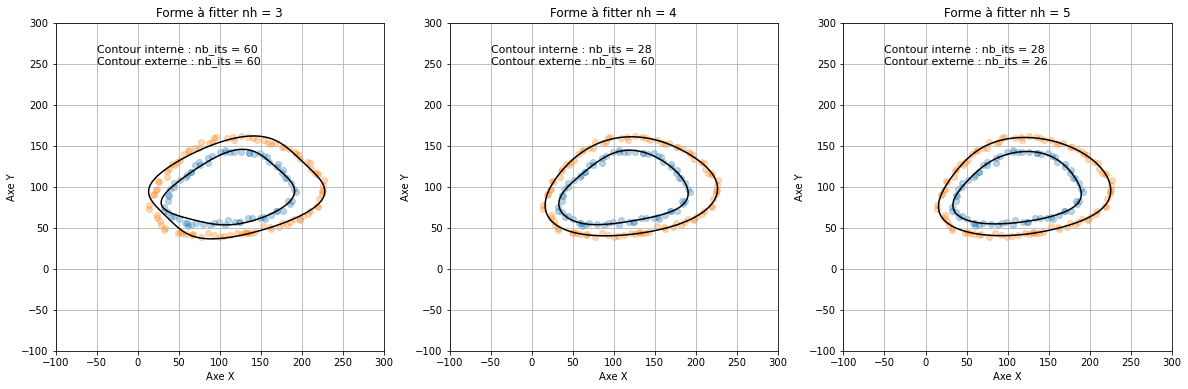

In [23]:
x0 = np.linspace(-500,500,2000)
y0 = np.linspace(-500,500,2000)
level = 1

plt.figure(figsize=(20,60))

###################################
plt.subplot(1,3,1)
plt.scatter(data_hq1b2[0],data_hq1b2[1],alpha = 0.3)
HQ_trace(lamda1nh3,x0,y0,level)
plt.scatter(data_hq2b2[0],data_hq2b2[1],alpha = 0.3)
HQ_trace(lamda2nh3,x0,y0,level)
plt.grid()
plt.title('Forme à fitter nh = 3')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.text(-50,250,f"Contour interne : nb_its = {n1nh3}\nContour externe : nb_its = {n2nh3}", fontsize = 11)
plt.axis([-100,300,-100,300])

###################################
plt.subplot(1,3,2)
plt.scatter(data_hq1b2[0],data_hq1b2[1],alpha = 0.3)
HQ_trace(lamda1nh4,x0,y0,level)
plt.scatter(data_hq2b2[0],data_hq2b2[1],alpha = 0.3)
HQ_trace(lamda2nh4,x0,y0,level)
plt.grid()
plt.title('Forme à fitter nh = 4')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.text(-50,250,f"Contour interne : nb_its = {n1nh4}\nContour externe : nb_its = {n2nh4}", fontsize = 11)
plt.axis([-100,300,-100,300])

######################################
plt.subplot(1,3,3)
plt.scatter(data_hq1b2[0],data_hq1b2[1],alpha = 0.3)
HQ_trace(lamda1nh5,x0,y0,level)
plt.scatter(data_hq2b2[0],data_hq2b2[1],alpha = 0.3)
HQ_trace(lamda2nh5,x0,y0,level)
plt.grid()
plt.title('Forme à fitter nh = 5')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.text(-50,250,f"Contour interne : nb_its = {n1nh5}\nContour externe : nb_its = {n2nh5}", fontsize = 11)
plt.axis([-100,300,-100,300])

**Commentaire:**

Pour cette forme nH = 4  suffit pour avoir un résultat satisfaisant.

On remarque que pour nH = 4 et nH = 5 on obtient le mème résultat de fitting, cependant, pour nH = 5 on obtient un résultat en moins d'ittérations que nH = 4.


In [24]:
# Paramètres:
v = 10**(8)
k1 = 10
k2 = 10
eps = 10**(-6)
nmax = 40
########################################################################
#hq1b1
x = np.array(data_hq1b5[0]) 
y = np.array(data_hq1b5[1])
# Calcul de smin et smax
xG, yG = np.mean(x), np.mean(y)
smax = 2 * np.sqrt( np.max( (x - xG)**2 + (y - yG)**2 ) )
smin = 2 * np.sqrt( np.min( (x - xG)**2 + (y - yG)**2 ) )

# Paramètres:
mu1 = (2/(k1*smax))**2
mu2 = (2/(k2*smin))**2

# Test algorithme
lamda = initialise_coefHQ(x,y,6)
lamda1nh6, n1nh6 = Levenberg_Marquardt (lamda, eps, nmax,v, mu1, mu2, x, y)

lamda = initialise_coefHQ(x,y,7)
lamda1nh7, n1nh7 = Levenberg_Marquardt (lamda, eps, nmax,v, mu1, mu2, x, y)

lamda = initialise_coefHQ(x,y,8)
lamda1nh8, n1nh8 = Levenberg_Marquardt (lamda, eps, 24,v, mu1, mu2, x, y)

########################################################################
#hq2b1
x = np.array(data_hq2b5[0])
y = np.array(data_hq2b5[1])
# Calcul de smin et smax
xG, yG = np.mean(x), np.mean(y)
smax = 2 * np.sqrt( np.max( (x - xG)**2 + (y - yG)**2 ) )
smin = 2 * np.sqrt( np.min( (x - xG)**2 + (y - yG)**2 ) )

# Paramètres:
mu1 = (2/(k1*smax))**2
mu2 = (2/(k2*smin))**2

# Test algorithme
lamda = initialise_coefHQ(x,y,6)
lamda2nh6, n2nh6 = Levenberg_Marquardt (lamda, eps, nmax,v, mu1, mu2, x, y)

lamda = initialise_coefHQ(x,y,7)
lamda2nh7, n2nh7 = Levenberg_Marquardt (lamda, eps, nmax,v, mu1, mu2, x, y)

lamda = initialise_coefHQ(x,y,8)
lamda2nh8, n2nh8 = Levenberg_Marquardt (lamda, eps, 24,v, mu1, mu2, x, y)

n = 0,     dlamd = 0.34664268126963504
n = 1,     dlamd = 0.0004910462555041372
n = 2,     dlamd = 0.0004502810344925089
n = 3,     dlamd = 0.00042129730127584406
n = 4,     dlamd = 0.000399118964588148
n = 5,     dlamd = 0.0027382111608427453
n = 6,     dlamd = 0.0016330757473496228
n = 7,     dlamd = 0.001551256588316552
n = 8,     dlamd = 0.0013267932304452676
n = 9,     dlamd = 0.001134284966776354
n = 10,     dlamd = 0.008573179613829314
n = 11,     dlamd = 0.006999421424375069
n = 12,     dlamd = 0.007643391327627025
n = 13,     dlamd = 0.01393166067815376
n = 14,     dlamd = 0.000560463813032538
n = 15,     dlamd = 0.0004621834190537576
n = 16,     dlamd = 0.002046710309089666
n = 17,     dlamd = 0.0025721921595022266
n = 18,     dlamd = 0.023711988966575122
n = 19,     dlamd = 0.021584098890285435
n = 20,     dlamd = 0.019636176813394194
n = 21,     dlamd = 0.017962391953524514
n = 22,     dlamd = 1.5781865623214255e-05
n = 23,     dlamd = 1.4724822716682262e-06
n = 24,     dla

(-100.0, 300.0, -100.0, 300.0)

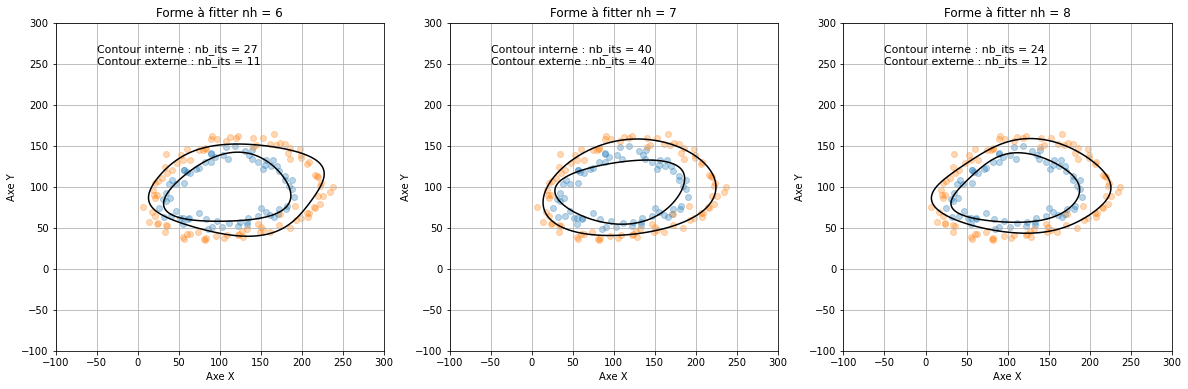

In [25]:
x0 = np.linspace(-500,500,2000)
y0 = np.linspace(-500,500,2000)
level = 1

plt.figure(figsize=(20,60))
plt.subplot(1,3,1)
plt.scatter(data_hq1b5[0],data_hq1b5[1], alpha = 0.3)
HQ_trace(lamda1nh6,x0,y0,level)
plt.scatter(data_hq2b5[0],data_hq2b5[1],alpha = 0.3)
HQ_trace(lamda2nh6,x0,y0,level)
plt.grid()
plt.title('Forme à fitter nh = 6')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.text(-50,250,f"Contour interne : nb_its = {n1nh6}\nContour externe : nb_its = {n2nh6}", fontsize = 11)
plt.axis([-100,300,-100,300])

###################################
plt.subplot(1,3,2)
plt.scatter(data_hq1b5[0],data_hq1b5[1],alpha = 0.3)
HQ_trace(lamda1nh7,x0,y0,level)
plt.scatter(data_hq2b5[0],data_hq2b5[1],alpha = 0.3)
HQ_trace(lamda2nh7,x0,y0,level)
plt.grid()
plt.title('Forme à fitter nh = 7')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.text(-50,250,f"Contour interne : nb_its = {n1nh7}\nContour externe : nb_its = {n2nh7}", fontsize = 11)
plt.axis([-100,300,-100,300])

######################################
plt.subplot(1,3,3)
plt.scatter(data_hq1b5[0],data_hq1b5[1],alpha = 0.3)
HQ_trace(lamda1nh8,x0,y0,level)
plt.scatter(data_hq2b5[0],data_hq2b5[1],alpha = 0.3)
HQ_trace(lamda2nh8,x0,y0,level)
plt.grid()
plt.title('Forme à fitter nh = 8')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.text(-50,250,f"Contour interne : nb_its = {n1nh8}\nContour externe : nb_its = {n2nh8}", fontsize = 11)
plt.axis([-100,300,-100,300])

**Commentaire:**

Le fitting ne commence à donner un résultat correcte qu'à partir de nh = 8.

## Conclusion

+ Plus nH est élevé plus le fitting est précis.
+ Le nombre d'ittérations de l'algorithme est inversement proportionnel au nombre de terme de $\lambda$.
+ Si un bruit est introduit au signal, il faudra un nombre de termes de $\lambda$ (nH) plus élevé pour réaliser le fitting.
+ Lors de l'exécution de l'algorithme, il arrive qu'à une certaine ittération (proche de la convergence) il y est une variation très rapide et très grande de $d\lambda$ que la machine n'arrive pas à calculer ce qui retourne $Nan$. Pour y remédier, il faut s'arrèter à l'ittération avant l'apparition de ce phénomène.